## **Working with Linear Regression**

## Step 1: Data Preparation

- Import the required libraries
- Load the Boston housing data set
- Prepare the data set


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
#https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
#https://fairlearn.org/main/user_guide/datasets/boston_housing_data.html
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True, parser='auto')
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [80]:
type(data)
data.dtypes
type(target)
target.dtypes

dtype('float64')

In [81]:
data.head

<bound method NDFrame.head of         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2  

In [15]:
#data,target,feature_names

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Step 2: Create a DataFrame and Check for Missing Values

- Create a DataFrame using the Boston housing data
- Display basic statistics
- Check for missing values


In [16]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


__Observation__:

- This is the head of the data set.

In [17]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,HousePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


__Observation__:
- Here, you can see the statistical analysis of the data set.

In [18]:
df.isna().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
HousePrice    0
dtype: int64

__Observation__:

- There are no empty rows in the dataset.

## Step 3: Remove Outliers from the HousePrice Column


- Use a boxplot to visualize the outliers
- Remove outliers from the __HousePrice__ column using the 1% and 99% quantiles


<Axes: ylabel='HousePrice'>

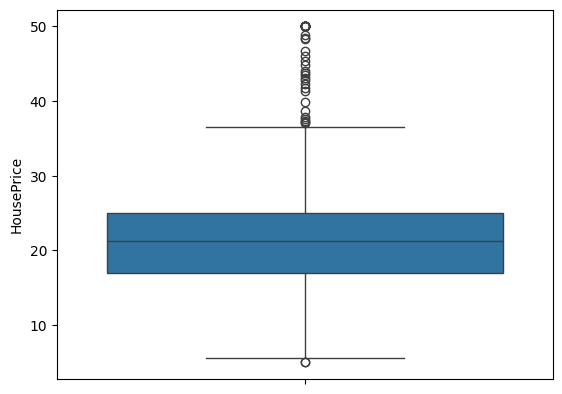

In [19]:
sns.boxplot(df['HousePrice'])

__Observation__:

- There are outliers in the data set.

In [20]:
upper_limit = df['HousePrice'].quantile(0.99)
lower_limit = df['HousePrice'].quantile(0.01)

In [50]:
#df.query('HousePrice > 40').count()
#df[df['HousePrice'] > 30]
#df[df['HousePrice'] > 40]
upper_limit, lower_limit

(50.0, 7.01)

In [51]:
df['HousePrice'] = np.where(df['HousePrice'] < lower_limit, lower_limit, df['HousePrice'])
df['HousePrice'] = np.where(df['HousePrice'] > upper_limit, upper_limit, df['HousePrice'])

In [52]:
np.where(df['HousePrice'] < lower_limit, lower_limit, df['HousePrice'])

array([24.  , 21.6 , 34.7 , 33.4 , 36.2 , 28.7 , 22.9 , 27.1 , 16.5 ,
       18.9 , 15.  , 18.9 , 21.7 , 20.4 , 18.2 , 19.9 , 23.1 , 17.5 ,
       20.2 , 18.2 , 13.6 , 19.6 , 15.2 , 14.5 , 15.6 , 13.9 , 16.6 ,
       14.8 , 18.4 , 21.  , 12.7 , 14.5 , 13.2 , 13.1 , 13.5 , 18.9 ,
       20.  , 21.  , 24.7 , 30.8 , 34.9 , 26.6 , 25.3 , 24.7 , 21.2 ,
       19.3 , 20.  , 16.6 , 14.4 , 19.4 , 19.7 , 20.5 , 25.  , 23.4 ,
       18.9 , 35.4 , 24.7 , 31.6 , 23.3 , 19.6 , 18.7 , 16.  , 22.2 ,
       25.  , 33.  , 23.5 , 19.4 , 22.  , 17.4 , 20.9 , 24.2 , 21.7 ,
       22.8 , 23.4 , 24.1 , 21.4 , 20.  , 20.8 , 21.2 , 20.3 , 28.  ,
       23.9 , 24.8 , 22.9 , 23.9 , 26.6 , 22.5 , 22.2 , 23.6 , 28.7 ,
       22.6 , 22.  , 22.9 , 25.  , 20.6 , 28.4 , 21.4 , 38.7 , 43.8 ,
       33.2 , 27.5 , 26.5 , 18.6 , 19.3 , 20.1 , 19.5 , 19.5 , 20.4 ,
       19.8 , 19.4 , 21.7 , 22.8 , 18.8 , 18.7 , 18.5 , 18.3 , 21.2 ,
       19.2 , 20.4 , 19.3 , 22.  , 20.3 , 20.5 , 17.3 , 18.8 , 21.4 ,
       15.7 , 16.2 ,

## Step 4: Test for Linearity of the Model

- Fit the model and display the summary
- Define functions to calculate residuals and plot actual vs. predicted values
- Test for linearity


In [82]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

boston.data = boston.data.apply(pd.to_numeric)

X_constant = sm.add_constant(np.asarray(boston.data))
boston_model = sm.OLS(boston.target, np.asarray(boston.data)).fit()
boston_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:18:05   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.007      -0.161      -0.025
x2             0.0487      0.014      3.382      0.001       0.020       0.077
x3            -0.0041      0.064     -0.063      0.950      -0.131       0.123
x4             2.8540      0.904      3.157      0.002       1.078       4.630
x5            -2.8684      3.359     -0.854      0.394      -9.468       3.731
x6             5.9281      0.309     19.178      0.000       5.321       6.535
x7            -0.0073      0.014     -0.526      0.599      -0.034       0.020
x8            -0.9685      0.196     -4.951      0.000      -1.353      -0.584
x9             0.1712      0.067      2.564      0.011       0.040       0.302
x10           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
x11           -0.3922      0.110     -3.570      0.000      -0.608      -0.176
x12            0.0149      0.003      5.528      0.000       0.010       0.020
x13           -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#data.dtypes
#boston.data.dtypes
#np.asarray(boston.data)
X_constant[0]

array([1.000e+00, 6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01,
       6.575e+00, 6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01,
       3.969e+02, 4.980e+00])

- Define a function to calculate residual values by taking the actual and predicted values
- The value of residuals is equal to the difference between the actual and  predicted values.  

In [83]:
def calculate_residuals(model, features, label):
    predictions =  model.predict(features)
    df_results = pd.DataFrame({'Actual' : label, 'Predicted' : predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

- Next, define a function to plot the actual and predicted values using __lmplot__.
- The orange line will show the fitted line created by the linear regression model.

In [84]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)

    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

- Now, run the function __linear_assumptions__ to show the graph with the model as __boston_model__, features as __boston.data__, and label as __boston.taget__ variables as arguments.

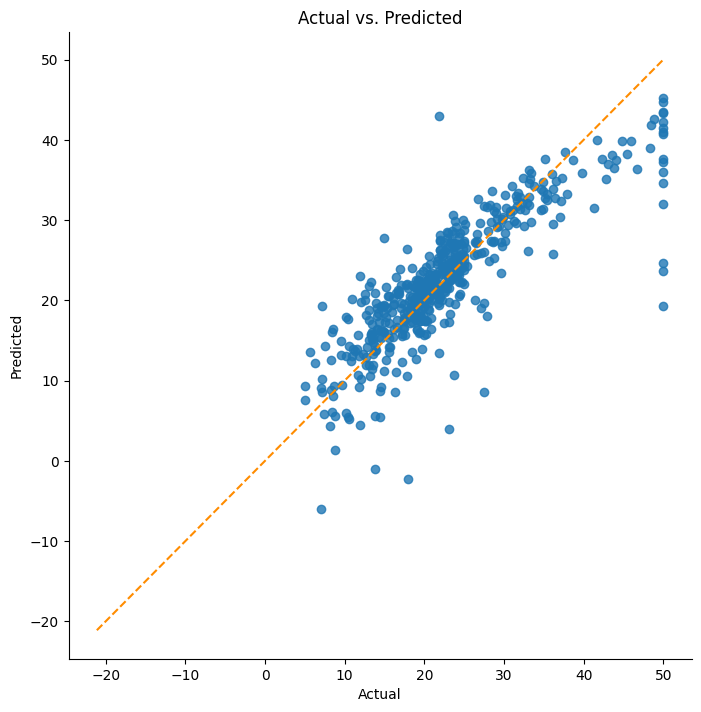

In [85]:
linear_assumptions(boston_model, boston.data, boston.target)

__Observation__:

- We can observe that the line does not represent all the data points.

## Step 5: Check for Multicollinearity

- Let's check the correlation between the variables in the data set.



In [86]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.383350
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360652
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483520
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175314
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.426749
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695893
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376485
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249068
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.380330
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.467613


- Calculate the variance inflation factor (VIF) for each feature
- Import the __variance_inflation_factor__ module from the __statsmodels.stats.outliers_influence__ library
- Set the features as the DataFrame, except the target variable
- Assign the __vif_data__ to the feature columns

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

x = df.drop(['HousePrice'], axis=1)
x = x.astype(float)  # Convert the array to float type

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns

vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

   Features        vif
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


__Observation__:
- From the above output, we can infer that the columns **NOX, RM, AGE,** and **PTRATIO** have higher multicollinearity. Hence, we can drop them. 

## Step 6: Remove Multicollinear Features and Split the Data set

- Remove highly multicollinear features from the data set


In [88]:
df1 = df.drop(['NOX', 'RM', 'AGE', 'PTRATIO'], axis = 1)

- Now, set the feature and target variables.

In [89]:
x = df1.drop(['HousePrice'], axis =1)
y = df1['HousePrice']

- Next, split the data into train and test sets.

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x, y, random_state=0, test_size=0.25)


## Step 7: Fit the Model and Evaluate Performance

- Fit the model using OLS and display the summary.


In [98]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test) 

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test) 

print(X_train.dtype)
print(y_train.dtype)
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

float64
float64
0
0
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              378.5
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                   1.20e-180
Time:                        18:02:15   Log-Likelihood:                         -1308.7
No. Observations:                 379   AIC:                                      2635.
Df Residuals:                     370   BIC:                                      2671.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

- Now, fit the model using linear regression.


In [100]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

X_test = pd.DataFrame(X_test)  # Convert X_test to a pandas DataFrame
X_test = X_test.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
X_test = np.asarray(X_test)  # Convert X_test to a numpy array

y_pred_test = reg.predict(X_test)  # Predict using the trained model

- Evaluate the model using various metrics such as the **r2_score, mean_absolute_error, and mean_squared_error**

In [102]:
print("R Square: {}".format(r2_score(y_train, y_pred_train)))
print("R Square: {}".format(r2_score(y_test, y_pred_test)))
print("MAE: {}".format(mean_absolute_error(y_train, y_pred_train)))
print("MSE: {}".format(mean_squared_error(y_train, y_pred_train)))

R Square: 0.6857716700262139
R Square: 0.5257075212801087
MAE: 3.766238016784235
MSE: 26.676235416618063


__Observation__:

- From the above output, we can observe that the model is a moderate fit for the given data.

In [ ]:
print("R Square: {}".format(r2_score(y_test, y_pred_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_test)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred_test)))

__Observation__:

- The model moderately explains the testing data, as indicated by the **R** **Square** value. 